# Assignment 1

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Decision Tree Classifier

In [269]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

train_data = pd.read_csv('Census Income Data Set/adult.data', names=column_names, sep=' *, *', na_values='?', engine='python')
test_data = pd.read_csv('Census Income Data Set/adult.test', names=column_names, sep=' *, *', skiprows=1, na_values='?',engine='python')

In [270]:
print("train_data null values:\n",train_data.isnull().sum(), "\n")
print("test_data null values:",test_data.isnull().sum().sum())

train_data null values:
 age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64 

test_data null values: 2203


In [271]:
train_data['net-capital'] = train_data['capital-gain'] - train_data['capital-loss']
test_data['net-capital'] = test_data['capital-gain'] - test_data['capital-loss']

train_data = train_data[train_data['native-country'] != 'Holand-Netherlands']
test_data = test_data[test_data['native-country'] != 'Holand-Netherlands']

to_drop = ['education', 'fnlwgt', 'capital-gain', 'capital-loss']
train_data.drop(to_drop, inplace=True, axis=1)
test_data.drop(to_drop, inplace=True, axis=1)

In [272]:
train_copy = train_data.copy()
train_copy["income"] = train_copy["income"].apply(lambda x:0 if x=='<=50K' else 1)

test_copy = test_data.copy()
test_copy["income"] = test_copy["income"].apply(lambda x:0 if x=='<=50K.' else 1)

X_train = train_copy.drop('income', axis=1)
y_train = train_copy['income']

X_test = test_copy.drop('income', axis=1)
y_test = test_copy['income']

In [273]:
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_columns = ['age', 'education-num', 'hours-per-week', 'net-capital']

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])

# z = np.abs(stats.zscore(X_train[numerical_columns], axis=1))
# threshold = 3
# X_train = X_train[(z < 3).all(axis=1)]

for column in categorical_columns:
    most_frequent_category = train_data[column].mode()[0]
    train_data[column].fillna(most_frequent_category, inplace=True)

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

In [274]:
log = LogisticRegression(max_iter=1000, solver='liblinear')
log.fit(X_train, y_train)

y_pred = log.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8459554081444629
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     13157
           1       0.58      0.71      0.64      3124

    accuracy                           0.85     16281
   macro avg       0.75      0.80      0.77     16281
weighted avg       0.86      0.85      0.85     16281



In [275]:
hyperparameters = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(estimator=log, param_grid=hyperparameters, cv=5, scoring='accuracy', error_score='raise')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8459554081444629
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     13157
           1       0.58      0.71      0.64      3124

    accuracy                           0.85     16281
   macro avg       0.75      0.80      0.77     16281
weighted avg       0.86      0.85      0.85     16281



In [276]:
print(best_params)

{'C': 1, 'penalty': 'l2'}


[[11542  1615]
 [  893  2231]]


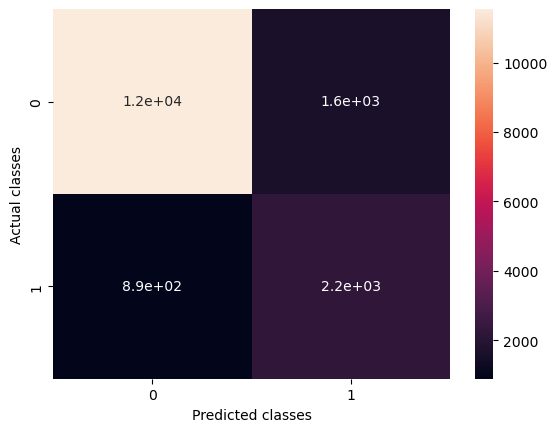

In [277]:
cfm = confusion_matrix(y_pred, y_test)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
print(cfm)

In [278]:
print(cfm)

[[11542  1615]
 [  893  2231]]
